# <center>k近邻法</center>

## 模型
对于新的输入实例,在训练集中找到与该实例最邻近的k个实例，这k个实例的多数属于某个分类,就把该输入实例分为这个类

## brute
遍历训练集中所有实例,找到最近的k个实例

score:1.0


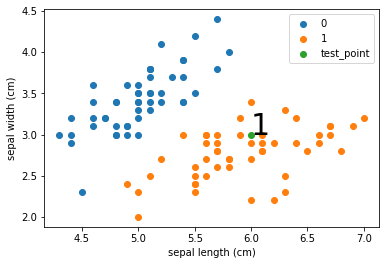

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from collections import Counter
from queue import PriorityQueue


class KNN:
    def __init__(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, x, k):
        """
        :param x: 预测的实例
        :param k: 预测时选取近邻点的个数
        """
        pq = PriorityQueue()
        for i in range(len(self.X_train)):
            dist = self.euclidean_distance(x, self.X_train[i])
            pq.put((dist, self.y_train[i]))

        labels = []
        for i in range(k):
            if not pq.empty():
                labels.append(pq.get()[1]) #least
        counter = Counter(labels)
        max_count_item = sorted(counter.items(), key=lambda a: a[1])[-1]
        return max_count_item[0]

    def score(self, X_test, y_test,k):
        """
        :param k: 预测时选取近邻点的个数
        """
        right_count = 0
        for xi, yi in zip(X_test, y_test):
            if self.predict(xi,k) == yi:
                right_count += 1
        return 1.0 * right_count / len(X_test)

    def euclidean_distance(self, a, b):
        return np.linalg.norm(a - b, ord=2)


# 0-49,0
# 50-99,1
def create_data():
    iris = datasets.load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = [f'{v}' for v in iris.target]
    feature_names = np.array(iris.feature_names[:2])
    data = np.array(df.iloc[:100, [0, 1, -1]])
    X, y = data[:, :-1], data[:, -1]
    return X, y, feature_names

k=3

X, y, feature_names = create_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = KNN(X_train, y_train)
print(f'score:{model.score(X_test, y_test,k)}')

plt.scatter(X[:50, 0], X[:50, 1], label=y[0])
plt.scatter(X[50:, 0], X[50:, 1], label=y[50])
test_point = [6.0, 3.0]
predict_label = model.predict(test_point,k)
plt.scatter(test_point[0], test_point[1], label='test_point')
plt.text(test_point[0], test_point[1], predict_label, fontsize=30)

plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.legend()